# Prediction of rainfall in Mawsynram, India

 
Forcasting Rainfall is very crucial for any types of agricultural task. Climate related data is important to analyse agricultural and crop seeding related field, where those data can be used to show the predict the rainfall in different season also for different types of crops.
There are several reasons why weather forecasts are important. They would certainly be missed if they were not there. It is a product of science that impacts the lives of many people. The following is a list of various reasons why weather forecasts are important: Helps people prepare for how to dress, Helps people plan outdoor activitie, Helps curious people to know what sort of weather can be expected, Helps businesses plan for transportation hazards that can result from the weather, Helps people with health related issues to plan the day, Helps businesses and people plan for severe weather and other weather hazards,Helps farmers and gardeners plan for crop irrigation and protection, Helps people involved with certain activities to know if conditions will be good, Helps people know outside weather dangers, Make an uncertain future a little more certain. 


# Will it be rain tomarrow ?

 After i did my mini reaserch, before diving into the deep of this project. I learned that taking a random city, like - Jerusalem - it's not a good idea for proving a connection between prediction of rain and other weather's feature. I got so little rainy days for this hot city.
And as a result the model of the machine learning was not accurate enough. At this moment i started to think - that the bigger the number of rainy days, the accurate the model will be, and i need to search for other place in the world :(.

I chose to go to the other side of the coin - the wattest place in the world - 'Mawsynram',India.

##### IMPORTING ALL THE PACKAGES  REQUIRED 

In [1]:
import os
import sys
import requests
!{sys.executable} -m pip install wwo-hist
import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import time
import datetime as dt
from datetime import datetime
from matplotlib.pyplot import rcParams
from sklearn import linear_model
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.preprocessing import normalize

## -----------------------------------------------------------------------------------------------------------------------

# Mini research for choosing the right place to pull weather on.
I started by downloding simple csv data on jerusalem

In [2]:
df_mini = pd.read_csv("historical_weather2006-2021.csv")
print (df_mini)

                               dt_iso  timezone  city_name        lat  \
0       2006-01-01 00:00:00 +0000 UTC      7200  Jerusalem  31.768319   
1       2006-01-01 01:00:00 +0000 UTC      7200  Jerusalem  31.768319   
2       2006-01-01 02:00:00 +0000 UTC      7200  Jerusalem  31.768319   
3       2006-01-01 03:00:00 +0000 UTC      7200  Jerusalem  31.768319   
4       2006-01-01 04:00:00 +0000 UTC      7200  Jerusalem  31.768319   
...                               ...       ...        ...        ...   
135253  2021-06-01 19:00:00 +0000 UTC     10800  Jerusalem  31.768319   
135254  2021-06-01 20:00:00 +0000 UTC     10800  Jerusalem  31.768319   
135255  2021-06-01 21:00:00 +0000 UTC     10800  Jerusalem  31.768319   
135256  2021-06-01 22:00:00 +0000 UTC     10800  Jerusalem  31.768319   
135257  2021-06-01 23:00:00 +0000 UTC     10800  Jerusalem  31.768319   

             lon   temp  feels_like  temp_min  temp_max  pressure  ...  \
0       35.21371  11.82       10.15     10.30    

##### Drop all NaN Columns

In [3]:
for col in df_mini.columns:
    if df_mini[col].count() == 0:
        print(col)
        df_mini.drop(col,axis='columns',inplace=True)

sea_level
grnd_level
rain_3h
snow_1h
snow_3h


##### Drop Columns with Only One Unique Value

In [4]:
for col in df_mini.columns:
    if len(df_mini[col].unique()) == 1:
        print(col)
        df_mini.drop(col,axis='columns',inplace=True)

city_name
lat
lon


####  Keep only independent and relevant variables Drop Columns with Only One Unique Value

In [5]:
cols_drop = ['feels_like','timezone','weather_id','weather_icon','weather_description','weather_main'] 
df_mini.drop(cols_drop,axis='columns',inplace=True)

##### Fix date

In [6]:
df_mini['dt_iso'] = df_mini['dt_iso'].apply(lambda x: x.split(' ')[0])

In [7]:
df_mini['dt_iso'] = pd.to_datetime(df_mini['dt_iso'])

##### fill NaN in rain_1h with 0

In [8]:
df_mini['rain_1h'].fillna(0,inplace=True)

##### Group by Date

In [9]:
group = df_mini.groupby('dt_iso',as_index=False).mean()

In [10]:
for i in group.index:
    group.loc[i+1,'yesterday'] = group.loc[i, 'rain_1h']

In [11]:
group.dropna(inplace=True)

##### Drop Date column

In [12]:
group.drop('dt_iso', axis=1, inplace=True)

##### Normalize for 

In [13]:
norm = pd.DataFrame(normalize(group,axis=1),index=group.index,columns=group.columns)

In [14]:
print (norm)

          temp  temp_min  temp_max  pressure  humidity  wind_speed  wind_deg  \
1     0.014811  0.012895  0.016841  0.985442  0.060431    0.002238  0.156734   
2     0.015956  0.010923  0.019431  0.996029  0.028503    0.003500  0.076772   
3     0.017134  0.011403  0.020185  0.993132  0.031371    0.008685  0.096274   
4     0.017300  0.013553  0.020091  0.986498  0.049392    0.002432  0.153037   
5     0.014820  0.012393  0.017301  0.961909  0.064172    0.002233  0.262378   
...        ...       ...       ...       ...       ...         ...       ...   
5626  0.023375  0.021113  0.027410  0.977054  0.064675    0.003274  0.198256   
5627  0.022058  0.019577  0.026175  0.978469  0.067959    0.003193  0.190655   
5628  0.023437  0.021358  0.027082  0.982943  0.057123    0.003102  0.169508   
5629  0.027074  0.024522  0.031246  0.985626  0.049883    0.003454  0.153801   
5630  0.023179  0.020464  0.027352  0.981482  0.061102    0.002893  0.176428   

      rain_1h  clouds_all  yesterday  


## ML Model

### Linear Regression       

##### For rain amount

In [15]:
features = norm[[col for col in norm if col != 'rain_1h']]
output = norm['rain_1h']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(features,output,test_size = 0.2)

In [17]:
model = LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
pd.DataFrame(model.coef_,index=features.columns,columns=['Coef'])

,Coef
temp,-0.027873
temp_min,0.003116
temp_max,0.022758
pressure,-0.001258
humidity,0.000746
wind_speed,0.025542
wind_deg,-0.000332
clouds_all,0.001120
yesterday,0.286654


In [20]:
y_pred = model.predict(x_test)

In [21]:
model.score(x_test,y_test)

0.3450771834633709

## --------------------------------------------------------------------------------------------------------------------

# Level 1- Data Acquisition 

###### Using an api to extract the data from https://www.worldweatheronline.com/ to csv file
Im using the name of the city, range between 2 dates and key that i needed

In [22]:
key='58ad68ddc757469cacc182047211906' # API key obtained from https://www.worldweatheronline.com/
locations=['Mawsynram'] # list of strings containg US Zipcode, UK Postcode, Canada Postalcode, IP address, Latitude/Longitude (decimal degree) or city name  
start='2008-07-01' # date when desired scraping period starts; preferred date format: 'dd-mmm-yyyy'
end='2021-06-18' # date when desired scraping period ends; preferred date format: 'dd-mmm-yyyy
freq=24 # frequency between observations; possible values 1 (1 hour), 3 (3 hours), 6 (6 hours), 12 (12 hours (day/night)) or 24 (daily averages)

In [ ]:
hist_weather_data = wwo_hist.retrieve_hist_data(
    api_key=key, 
    location_list=locations, 
    start_date=start, 
    end_date=end, 
    frequency=freq, 
    location_label=False, 
    export_csv=True, 
    store_df=False
)

### I wanted to show another way to extract data using an api, that actually cost money, please do not run the next cell. Every run send a request, and the requests for the historical weather data cost money. The data comes as json format. I convert it to dic format.

In [39]:
# key='K45RACC8JPJVDLSFJQH8LUFWC'
# url = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Mawsynram/2000-1-1/2021-6-1?unitGroup=metric&key=K45RACC8JPJVDLSFJQH8LUFWC&include=histfcst'
# r=requests.get(url)
#data=eval(r)

In [49]:
with open(r"Mawsynram_data.json",'w') as file:
    file.write(str(r"Mawsynram_data.json"))

In [50]:
with open(r"Mawsynram_data.json") as file:
    raw_data = file.read()

In [51]:
data = eval(raw_data)

NameError: name 'Mawsynram_data' is not defined

In [ ]:
days = data['days']

In [24]:
df = pd.DataFrame(days)

NameError: name 'days' is not defined

# Level 2- Data Cleaninng 

In [65]:
df = pd.read_csv("Mawsynram.csv")
df

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2008-07-01,26,19,0.0,8.6,5,4,02:14 AM,04:41 PM,04:37 AM,...,9,96,99,69.0,1003,26,6,190,6,Mawsynram
1,2008-07-02,25,19,0.0,8.6,5,0,03:18 AM,05:48 PM,04:37 AM,...,4,100,99,51.7,1002,25,7,180,3,Mawsynram
2,2008-07-03,24,20,0.0,8.6,5,0,04:26 AM,06:47 PM,04:37 AM,...,6,99,99,102.1,1002,24,5,215,3,Mawsynram
3,2008-07-04,25,19,0.0,8.6,5,3,05:38 AM,07:37 PM,04:38 AM,...,6,100,99,45.5,1003,25,7,167,4,Mawsynram
4,2008-07-05,22,19,0.0,8.6,5,10,06:46 AM,08:20 PM,04:38 AM,...,4,100,99,46.5,1002,22,7,161,3,Mawsynram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731,2021-06-14,24,17,0.0,11.0,5,26,07:37 AM,09:35 PM,04:33 AM,...,4,66,91,22.5,1001,24,8,178,2,Mawsynram
4732,2021-06-15,24,16,0.0,8.6,5,34,08:34 AM,10:16 PM,04:33 AM,...,10,83,92,36.3,1000,24,8,163,6,Mawsynram
4733,2021-06-16,24,18,0.0,9.8,5,42,09:32 AM,10:54 PM,04:33 AM,...,10,73,88,10.1,1001,24,9,143,7,Mawsynram
4734,2021-06-17,24,15,0.0,8.6,5,49,10:30 AM,11:31 PM,04:33 AM,...,12,78,86,8.4,1004,24,7,157,9,Mawsynram


##### Examine Data Statistics
Here we can see that in 75% of the days- the weather is very rainy as we need for our search - near the std !
Moreover we can examine which feature (column) has constant values. These columns are probabley wan't help us proving the research question - and we should delete them! 

In [66]:
df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,4736.000000,4736.000000,4736.0,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000
mean,22.349662,14.780405,0.0,9.944172,4.556377,46.048564,15.386824,18.889147,19.376900,18.506123,6.545819,49.094172,84.071368,17.857432,1009.281039,22.349662,7.594595,180.406039,4.073480
std,2.991821,4.958872,0.0,1.977156,0.747675,31.273643,5.534787,4.325090,4.554127,3.830181,3.180460,28.354678,13.613164,25.785133,5.320220,2.991821,1.794019,48.457312,2.088862
min,11.000000,1.000000,0.0,3.900000,2.000000,0.000000,-4.000000,7.000000,7.000000,7.000000,2.000000,0.000000,20.000000,0.000000,993.000000,11.000000,3.000000,30.000000,1.000000
25%,20.000000,11.000000,0.0,8.700000,4.000000,18.000000,10.000000,16.000000,16.000000,16.000000,4.000000,23.750000,78.000000,0.300000,1005.000000,20.000000,6.000000,152.000000,3.000000
50%,23.000000,16.000000,0.0,10.100000,5.000000,46.000000,16.000000,20.000000,20.000000,20.000000,6.000000,51.000000,88.000000,9.400000,1010.000000,23.000000,8.000000,190.000000,3.000000
75%,24.000000,19.000000,0.0,11.600000,5.000000,73.000000,20.000000,22.000000,23.000000,22.000000,8.000000,72.000000,94.000000,25.125000,1014.000000,24.000000,9.000000,213.000000,5.000000
max,32.000000,24.000000,0.0,13.800000,7.000000,100.000000,25.000000,30.000000,30.000000,26.000000,34.000000,100.000000,100.000000,304.700000,1021.000000,32.000000,10.000000,316.000000,22.000000


##### ****************Renaming the  precipMM column*****************
 We will refer it as the amount of rain:

In [67]:
df.rename(columns={"precipMM": "RainMM"},inplace=True)

In [68]:
 df['date_time'] = pd.to_datetime(df['date_time'])

##### I period the date to months, had another column

In [69]:
df['Month'] = df['date_time'].dt.month

In [70]:
print(df)

      date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0    2008-07-01        26        19           0.0      8.6        5   
1    2008-07-02        25        19           0.0      8.6        5   
2    2008-07-03        24        20           0.0      8.6        5   
3    2008-07-04        25        19           0.0      8.6        5   
4    2008-07-05        22        19           0.0      8.6        5   
...         ...       ...       ...           ...      ...      ...   
4731 2021-06-14        24        17           0.0     11.0        5   
4732 2021-06-15        24        16           0.0      8.6        5   
4733 2021-06-16        24        18           0.0      9.8        5   
4734 2021-06-17        24        15           0.0      8.6        5   
4735 2021-06-18        24        15           0.0      8.6        5   

      moon_illumination  moonrise     moonset   sunrise  ... cloudcover  \
0                     4  02:14 AM    04:41 PM  04:37 AM  ...         96 

# Level 3- Inital Visualization

##### For the visualisation level i build couple of df with the main dataframe i had. For each of it i did different manipulation.
df_corr,  
norm_df,  
df_col_drop

Here i chose to exhibit the dataframe in heatmap - which can help me examine - which of the features has strong Direct connection with rainfall.
I discover that : 'mintempC','FeelsLikeC','cloudcover','WindGustKmph','pressure','humidity','windspeedKmph',WindChillC','DewPointC' has the most strong connection.

In [71]:
print(df.columns)

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'RainMM', 'pressure', 'tempC',
       'visibility', 'winddirDegree', 'windspeedKmph', 'location', 'Month'],
      dtype='object')


<AxesSubplot:>

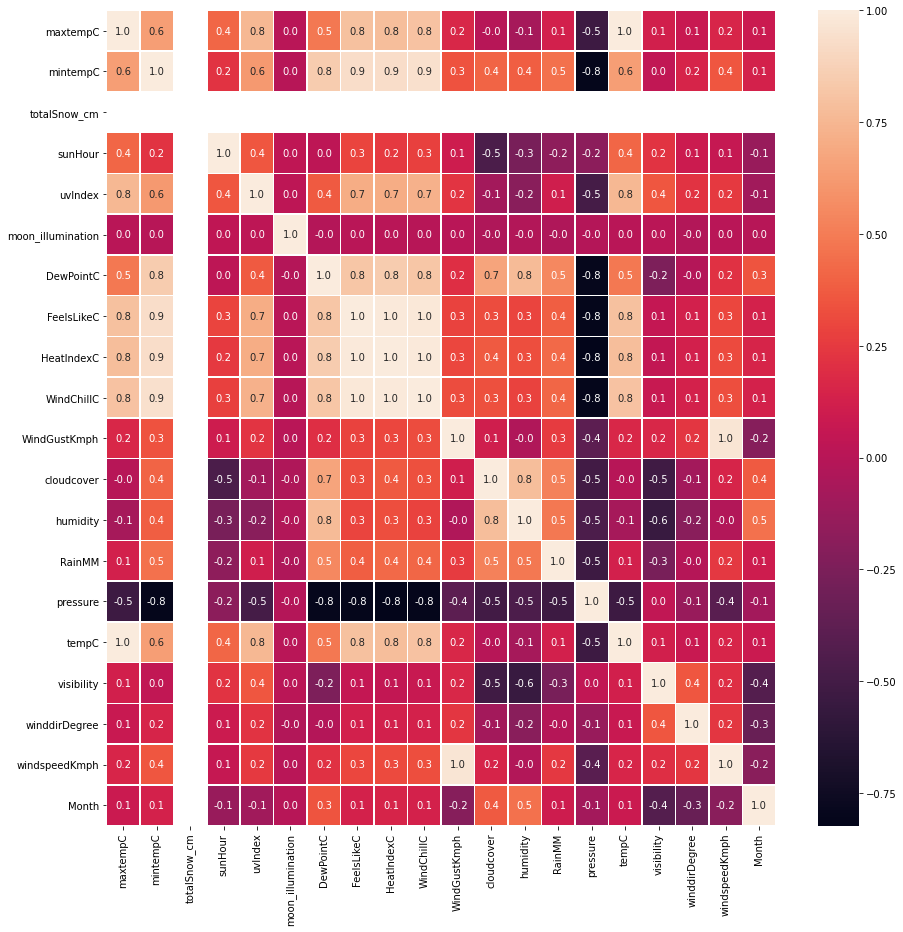

In [72]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#### Here i chose to rebuild my dataframe with only the strong features to get good modelin the end 

In [73]:
df_corr = df.corr()
df_corr.drop('RainMM',inplace=True)
df_corr.dropna(how='all',inplace=True)
df_corr.dropna(how='all',axis=1,inplace=True)
coef = df_corr[(df_corr >= 0.3)|(df_corr <= -0.3)][['RainMM']].dropna().reset_index()

#### In this graph i wanted to exhibit the connection between features and rainfall by Bar plot.

<AxesSubplot:xlabel='index', ylabel='RainMM'>

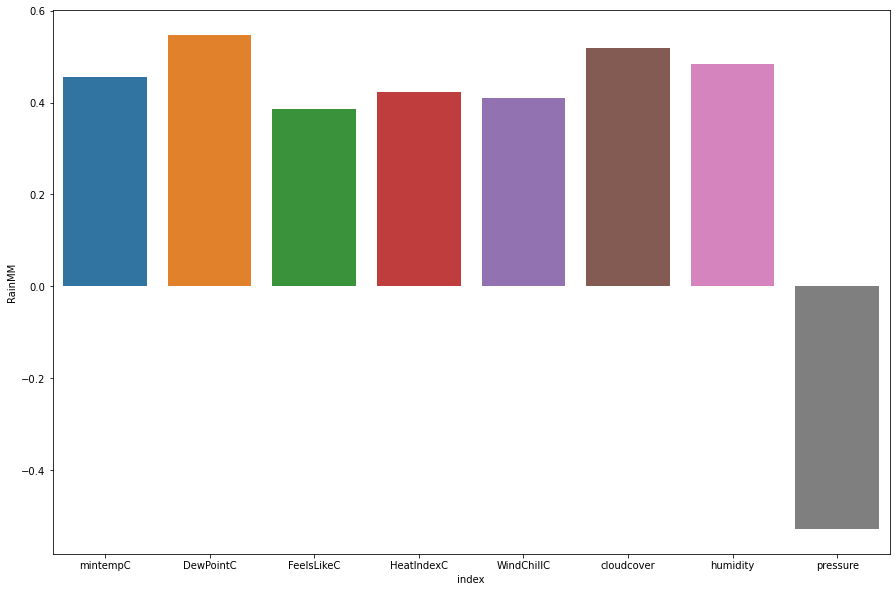

In [74]:
plt.subplots(figsize=(15,10))
sns.barplot(x='index',y='RainMM',data=coef)

##### I was fascinated to see when in the seasons of INDIA its Fall (with most preciption) and when its Summer

In [75]:
df_month = df[['Month','RainMM']].groupby('Month',as_index=False).mean()

C:\Users\tommy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='RainMM'>

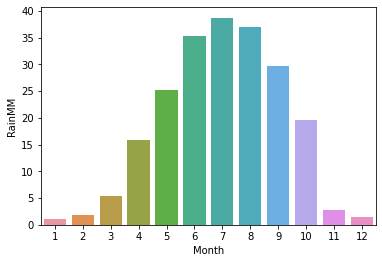

In [76]:
sns.barplot('Month','RainMM',data=df_month)

##### Drop Columns with Only One Unique Value

In [77]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        print(col)
        df.drop(col,axis='columns',inplace=True)

totalSnow_cm
location


##### Keep only independent and relevant variables

In [78]:
df_col_drop = df[coef['index'].tolist()+['RainMM']]

In [79]:
print (df_col_drop)

      mintempC  DewPointC  FeelsLikeC  HeatIndexC  WindChillC  cloudcover  \
0           19         23          23          26          23          96   
1           19         23          23          26          23         100   
2           20         23          23          25          23          99   
3           19         23          23          25          23         100   
4           19         22          22          24          22         100   
...        ...        ...         ...         ...         ...         ...   
4731        17         21          24          24          21          66   
4732        16         21          23          23          21          83   
4733        18         21          24          24          22          73   
4734        15         20          23          23          21          78   
4735        15         20          23          23          21          74   

      humidity  pressure  RainMM  
0           99      1003    69.0  
1    

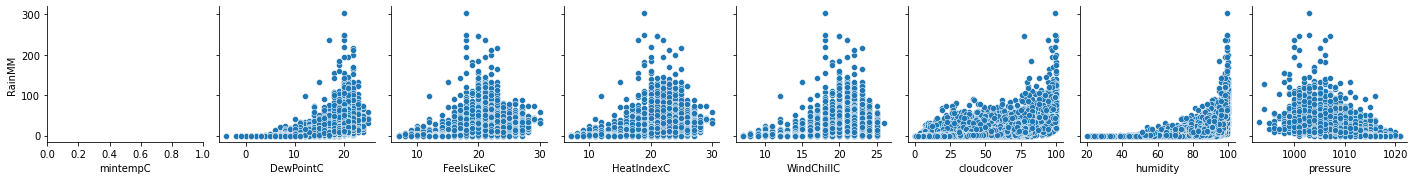

In [80]:
sns.pairplot(df_col_drop,y_vars = ['RainMM'], x_vars = coef['index'])

In [81]:
df.count()

date_time            4736
maxtempC             4736
mintempC             4736
sunHour              4736
uvIndex              4736
moon_illumination    4736
moonrise             4736
moonset              4736
sunrise              4736
sunset               4736
DewPointC            4736
FeelsLikeC           4736
HeatIndexC           4736
WindChillC           4736
WindGustKmph         4736
cloudcover           4736
humidity             4736
RainMM               4736
pressure             4736
tempC                4736
visibility           4736
winddirDegree        4736
windspeedKmph        4736
Month                4736
dtype: int64

In [82]:
sum(df_col_drop['RainMM'].isna())

0

In [83]:
df

,date_time,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindGustKmph,cloudcover,humidity,RainMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,Month
0,2008-07-01,26,19,8.6,5,4,02:14 AM,04:41 PM,04:37 AM,06:18 PM,...,9,96,99,69.0,1003,26,6,190,6,7
1,2008-07-02,25,19,8.6,5,0,03:18 AM,05:48 PM,04:37 AM,06:18 PM,...,4,100,99,51.7,1002,25,7,180,3,7
2,2008-07-03,24,20,8.6,5,0,04:26 AM,06:47 PM,04:37 AM,06:18 PM,...,6,99,99,102.1,1002,24,5,215,3,7
3,2008-07-04,25,19,8.6,5,3,05:38 AM,07:37 PM,04:38 AM,06:18 PM,...,6,100,99,45.5,1003,25,7,167,4,7
4,2008-07-05,22,19,8.6,5,10,06:46 AM,08:20 PM,04:38 AM,06:18 PM,...,4,100,99,46.5,1002,22,7,161,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731,2021-06-14,24,17,11.0,5,26,07:37 AM,09:35 PM,04:33 AM,06:15 PM,...,4,66,91,22.5,1001,24,8,178,2,6
4732,2021-06-15,24,16,8.6,5,34,08:34 AM,10:16 PM,04:33 AM,06:15 PM,...,10,83,92,36.3,1000,24,8,163,6,6
4733,2021-06-16,24,18,9.8,5,42,09:32 AM,10:54 PM,04:33 AM,06:16 PM,...,10,73,88,10.1,1001,24,9,143,7,6
4734,2021-06-17,24,15,8.6,5,49,10:30 AM,11:31 PM,04:33 AM,06:16 PM,...,12,78,86,8.4,1004,24,7,157,9,6


In [84]:
for i in df_col_drop.index[1:]:
    df_col_drop.loc[i,'yesterday'] = df_col_drop.loc[i-1,'RainMM']

C:\Users\tommy\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\tommy\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [85]:
for i in df_col_drop.index[:-1]:
    df_col_drop.loc[i,'tommorow'] = df_col_drop.loc[i+1,'RainMM']

In [86]:
df_col_drop['yesterday'].fillna(df_col_drop['yesterday'].median(),inplace=True)
df_col_drop['tommorow'].fillna(df_col_drop['tommorow'].median(),inplace=True)

C:\Users\tommy\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<ipython-input-87-21faeba211cb>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  mp.subplot(2,2,2)


Text(0, 0.5, 'cloudcover')

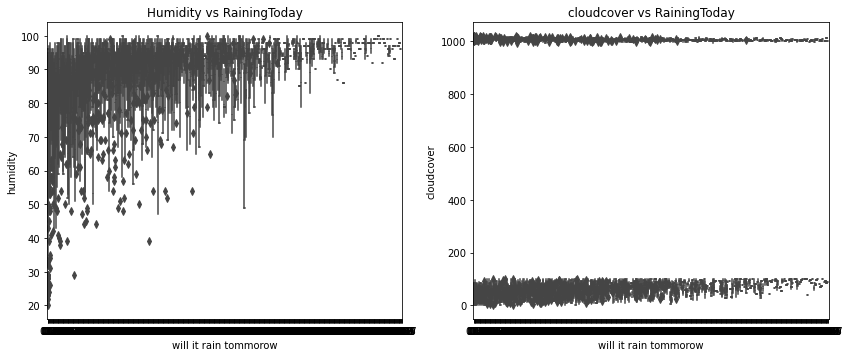

In [87]:
mp.figure(1,figsize=[14,12])

#Subplot 1
mp.subplot(2,2,1)
sb.boxplot(data=df_col_drop,y="humidity",x="tommorow")
mp.title("Humidity vs RainingToday")
mp.xlabel("will it rain tommorow")
mp.ylabel("humidity")

#Subplot 2
mp.subplot(2,2,2)
sb.boxplot(data=df_col_drop,y="pressure",x="tommorow")
mp.title("Pressure vs RainingToday")
mp.xlabel("will it rain tommorow")
mp.ylabel("Pressure")

#Subplot 3
mp.subplot(2,2,2)
sb.boxplot(data=df_col_drop,y="cloudcover",x="tommorow")
mp.title("cloudcover vs RainingToday")
mp.xlabel("will it rain tommorow")
mp.ylabel("cloudcover")

# Level 4 - ML Models

## I descovered that doing  normalization to the dataframe can improve the accuracy of the model , so i normalize df_col_drop(dataframe).
Mainwhile i was fascinated to see if there is a change between a model of a binary_df - a dataframe that took df_col_drop and  switched the quantity of the rain in 'RainMM','yesterday','tommorow' to 1 or 0 - (rainning or not rainning by filtering the quantity - if it bigger than 5MM)
First i took the data without this manipulation and only did normalization. 

##### Normalize the dataframe 'df_col_drop'

In [88]:
norm_df = pd.DataFrame(normalize(df_col_drop,axis=1),index=df_col_drop.index,columns=df_col_drop.columns)

### Linear Regression
I chose this type of machine learning model because all of my values in dataframe are numerical. In addition, Regression models are a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. In my research there is the independent variables:humidity,pressure,temp_min and more and the dependent variable - RainMM.

##### For rain amount


In [89]:
ml_df = norm_df.copy()

In [90]:
features = ml_df[[col for col in df_col_drop.columns if col != 'tommorow']]
output = ml_df['tommorow']

In [91]:
x_train, x_test, y_train, y_test = train_test_split(features,output,test_size = 0.2)

In [92]:
model = LinearRegression()

In [93]:
model.fit(x_train,y_train)

LinearRegression()

In [95]:
pd.DataFrame(model.coef_,index=features.columns,columns=['Coef'])

,Coef
mintempC,0.717550
DewPointC,0.888745
FeelsLikeC,-1.477929
HeatIndexC,2.849943
WindChillC,-1.495851
cloudcover,-0.331756
humidity,-0.088970
pressure,-6.066538
RainMM,-0.198232
yesterday,-0.365163


In [96]:
y_pred = model.predict(x_test)

### The results of the accurency of the model is bigger than 0.5 - which indicate for succeding of the prediction of rain tommorow.

In [97]:
model.score(x_test,y_test)

0.6474825332804892

In [98]:
models = []
r2 = []

for i in range(10):
    features = ml_df[[col for col in ml_df.columns if col != 'tommorow']]
    output = ml_df['tommorow']

    x_train, x_test, y_train, y_test = train_test_split(features,output,test_size = 0.2)

    model = LinearRegression()

    model.fit(x_train,y_train)

    y_pred = model.predict(x_test)

    score = model.score(x_test,y_test)
    
    models.append(model)
    r2.append(score)

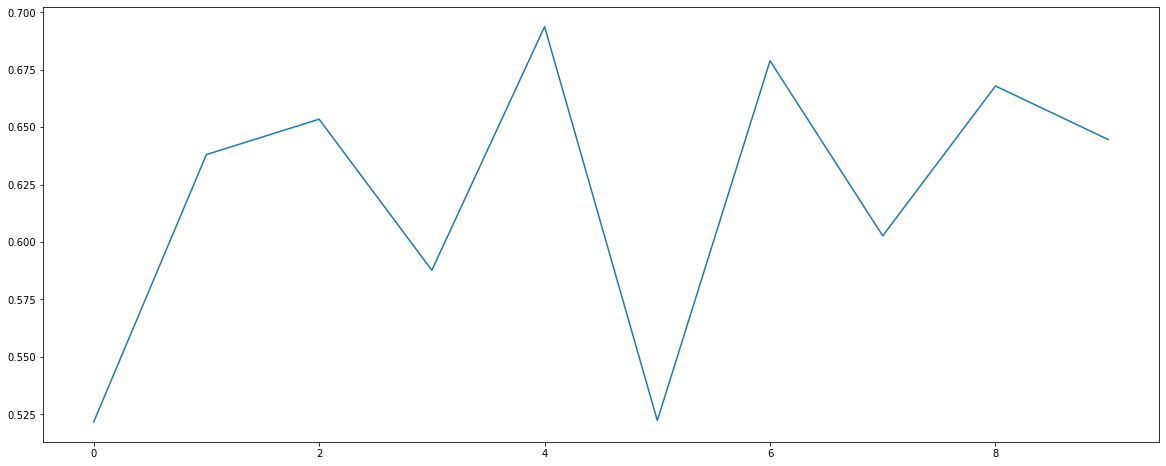

In [99]:
plt.subplots(figsize=(20,8))
plt.plot(r2)

## ------------------------------------------------------------------------------------------------------------------------

## Binary values dataframe 
#### Model of dataframe switching to binary values in columns - 'yesterday' , 'today' and 'RainMM' as 1 or 0 ( rain= 1, not rain=0), if the quantity of perciption are bigger than 5MM

In [130]:
df_col_drop['yesterday'].fillna(df_col_drop['yesterday'].median(),inplace=True)
df_col_drop['tommorow'].fillna(df_col_drop['tommorow'].median(),inplace=True)

C:\Users\tommy\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [131]:
df_binary = df_col_drop.copy() # making a copy/ new data frame for the binary data frame.
df_binary.loc[df_binary['RainMM'] > 1,'RainMM'] = 1
df_binary.loc[df_binary['RainMM'] <= 1,'RainMM'] = 0
df_binary.loc[df_binary['yesterday'] <= 1,'yesterday'] = 0
df_binary.loc[df_binary['yesterday'] > 1,'yesterday'] = 1
df_binary.loc[df_binary['tommorow'] <= 1,'tommorow'] = 0
df_binary.loc[df_binary['tommorow'] > 1,'tommorow'] = 1

In [132]:
norm_df = pd.DataFrame(normalize(df_binary,axis=1),index=df_binary.index,columns=df_binary.columns)

In [138]:
ml_df_binary = norm_df.copy()

In [139]:
features = ml_df_binary[[col for col in df_col_drop.columns if col != 'tommorow']]
output = ml_df_binary['tommorow']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features,output,test_size = 0.2)

In [141]:
model2 = LinearRegression()

In [142]:
model2.fit(x_train,y_train)

LinearRegression()

In [143]:
pd.DataFrame(model2.coef_,index=features.columns,columns=['Coef'])

,Coef
mintempC,0.801914
DewPointC,0.793013
FeelsLikeC,-1.130440
HeatIndexC,2.404151
WindChillC,-1.450908
cloudcover,-0.316250
humidity,-0.075066
pressure,-5.929801
RainMM,-0.168431
yesterday,-0.357278


In [144]:
y_pred = model2.predict(x_test)

In [295]:
model.score(x_test,y_test)

0.1043747007557424

In [146]:
models = []
r2 = []

for i in range(10):
    features = ml_df_binary[[col for col in ml_df_binary.columns if col != 'tommorow']]
    output = ml_df_binary['tommorow']

    x_train, x_test, y_train, y_test = train_test_split(features,output,test_size = 0.2)

    model2 = LinearRegression()

    model2.fit(x_train,y_train)

    y_pred = model2.predict(x_test)

    score = model2.score(x_test,y_test)
    
    models.append(model2)
    r2.append(score)

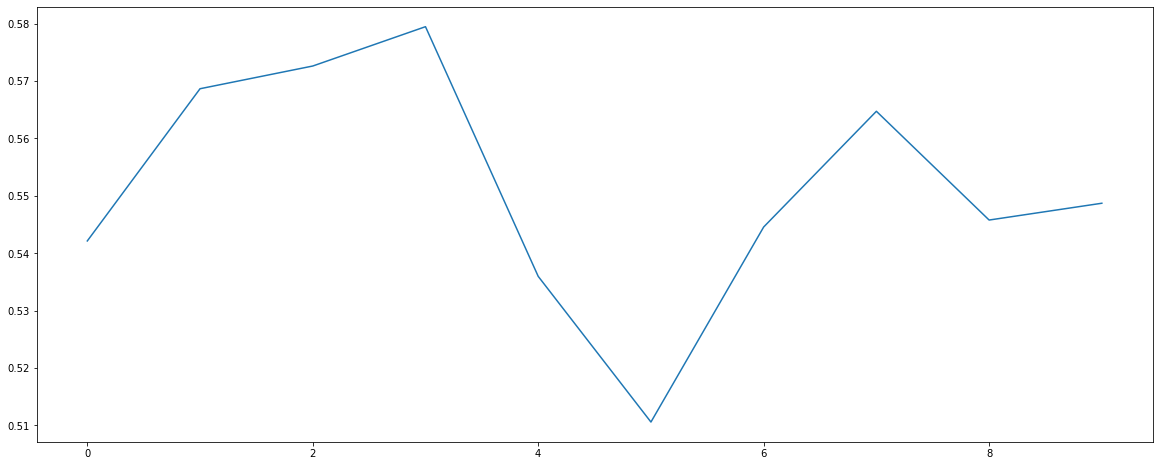

In [147]:
plt.subplots(figsize=(20,8))
plt.plot(r2)

# ~The End